In [2]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [69]:
import gspread

key = "Your API Key"
gc = gspread.api_key(key)
sh = gc.open_by_key("Your API Key")

In [70]:
import pandas as pd

worksheet = sh.sheet1 # or sh.get_worksheet(0) for the first sheet

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # First row is header

df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,


In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
def create_tfidf_for_answers(df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer

    # Fit and transform the 'answer' column
    tfidf_matrix = vectorizer.fit_transform(df['answer'].astype(str))

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    return tfidf_df

tfidf_answers = create_tfidf_for_answers(df)
tfidf_answers.head()

,10,11,12345678,13,15,18,1811528,19c,20,2021,...,übersehene,übersehenes,übersicht,übertragung,überwachen,überwacht,überwachung,überwachungsfähigkeiten,üblichen,œuvre
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.072893,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.066198,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(tfidf_answers.shape)
print(tfidf_answers.columns)

(1566, 11329)
Index(['10', '11', '12345678', '13', '15', '18', '1811528', '19c', '20',
       '2021',
       ...
       'übersehene', 'übersehenes', 'übersicht', 'übertragung', 'überwachen',
       'überwacht', 'überwachung', 'überwachungsfähigkeiten', 'üblichen',
       'œuvre'],
      dtype='object', length=11329)


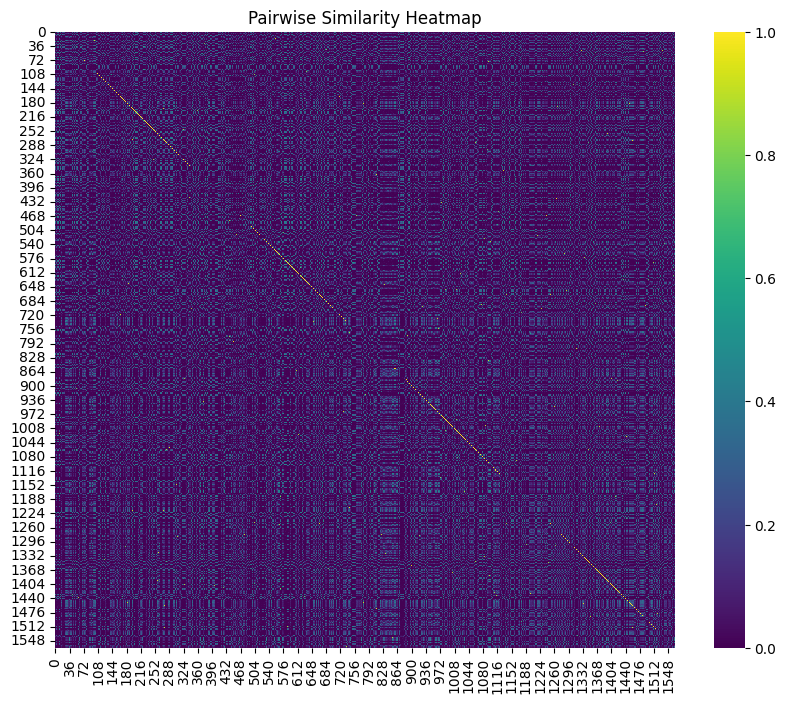

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming tfidf_answers is your TF-IDF matrix DataFrame
# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(tfidf_answers)

# Convert to DataFrame for easier handling
similarity_df = pd.DataFrame(similarity_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(similarity_df, cmap="viridis")  # Use a suitable colormap
plt.title("Pairwise Similarity Heatmap")
plt.show()

        PC1       PC2       PC3
0 -0.165739  0.527520 -0.027509
1 -0.139883  0.460098 -0.024611
2 -0.309536 -0.203443 -0.010855
3 -0.322116 -0.211139 -0.015516
4  0.179414 -0.045781 -0.095837
Explained variance ratio: [0.08627261 0.07630188 0.04452609]


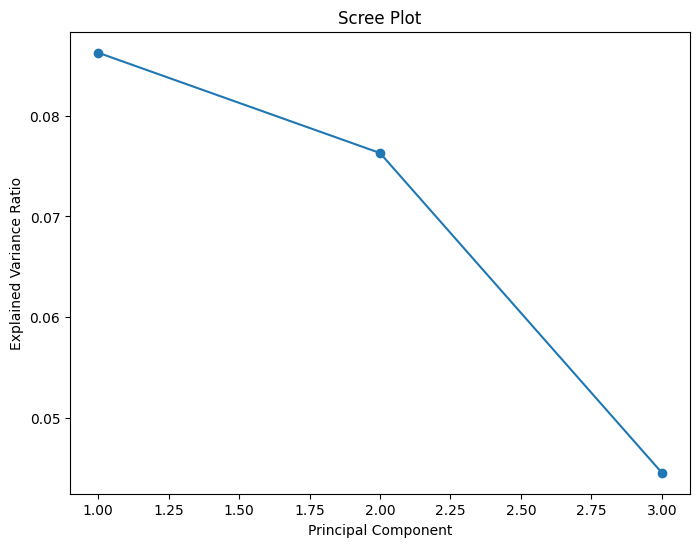

In [8]:
# prompt: use pca on 'tfidf_answers' and get top 3 pca Principal Components

import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_answers)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())


explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

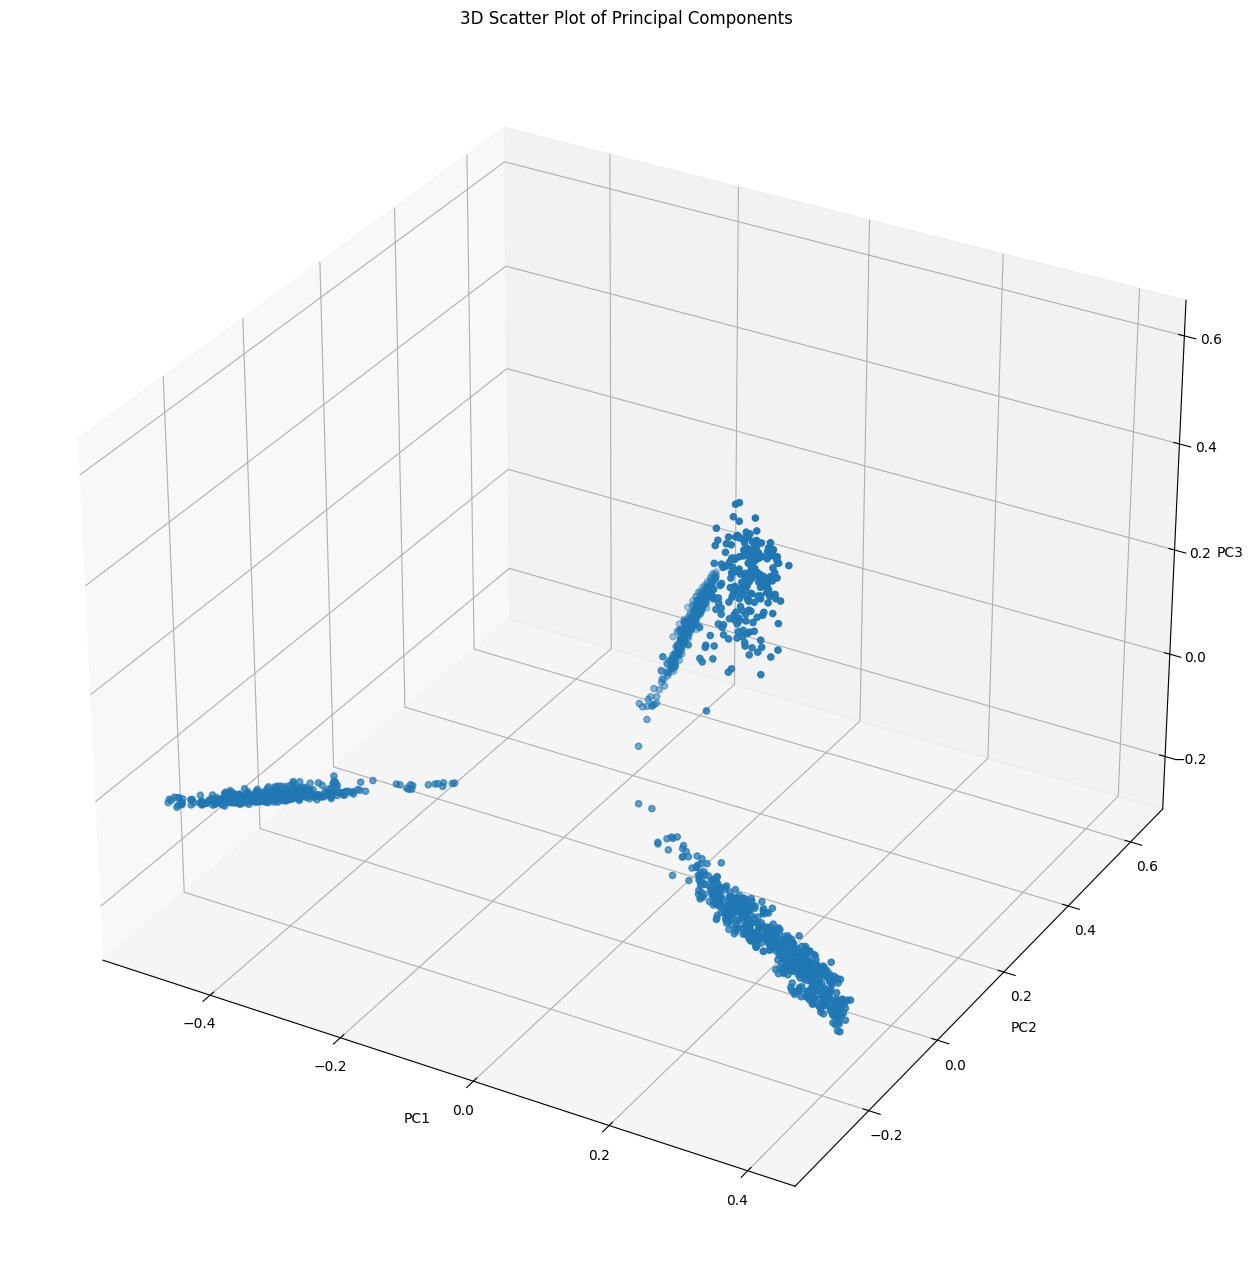

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 16))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of Principal Components')
plt.show()

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.165739  0.527520 -0.027509 -0.029872 -0.038098  0.104170  0.082520   
1 -0.139883  0.460098 -0.024611 -0.021840  0.047422 -0.071094 -0.070175   
2 -0.309536 -0.203443 -0.010855 -0.011745  0.233787  0.125336 -0.003484   
3 -0.322116 -0.211139 -0.015516 -0.008478 -0.023352 -0.065000  0.007186   
4  0.179414 -0.045781 -0.095837  0.249072  0.012385 -0.022173  0.024503   

        PC8       PC9      PC10  
0  0.056543 -0.054350  0.128018  
1 -0.151332 -0.020343 -0.011669  
2 -0.030068  0.019708 -0.055246  
3 -0.011913 -0.028564 -0.164336  
4 -0.067042 -0.066412  0.003710  
Explained variance ratio: [0.08627261 0.07630188 0.04452609 0.03095737 0.01140262 0.00841046
 0.00710837 0.00608897 0.00584855 0.00555921]


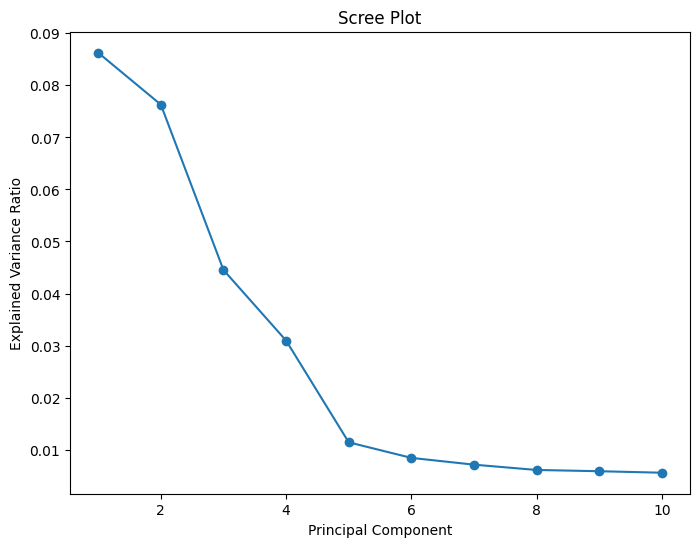

In [10]:
# prompt: use pca on 'tfidf_answers' and get top 3 pca Principal Components

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
pca_result = pca.fit_transform(tfidf_answers)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}'for i in range(10)])
print(pca_df.head())

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [11]:
print(sum(pca.explained_variance_ratio_[:3])*100,'\n',sum(pca.explained_variance_ratio_[:5])*100,'\n',sum(pca.explained_variance_ratio_[:10])*100)

20.710057361205514 
 24.946056825913875 
 28.247611947339596


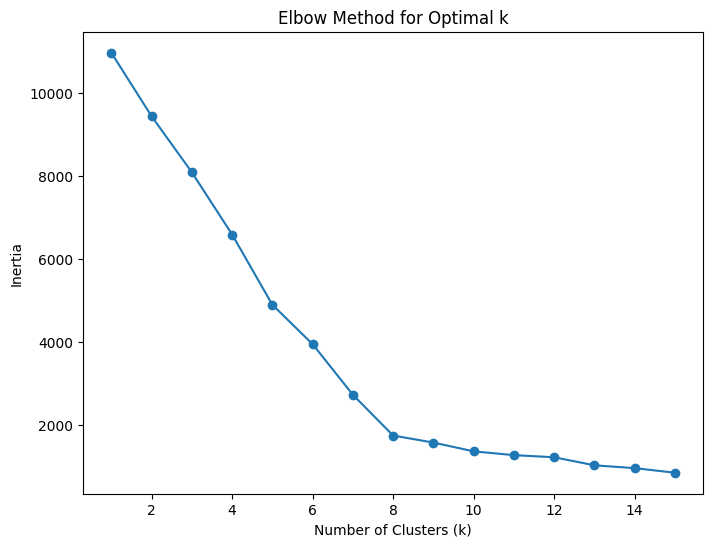

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=7)
pca_result = pca.fit_transform(tfidf_answers)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_result)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [73]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_data)
df["answer_label"] = kmeans.labels_
df

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,,1
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,,6
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,,5
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,,0
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,9974052734733,Immediate Assistance Requested,"Dear Customer Support Team,\n\n\nI am contacti...",Subject: Re: Immediate Assistance Requested\n\...,Request,Technical Support,high,en,IT Consulting Firm,IT Support,Urgent Issue,Network Issue,Problem Resolution,Technical Guidance,Service Recovery,Performance Tuning,,,1
1562,9976062913094,Demande de consultation de serveur,"Cher support client,\n\n\nJe vous écris pour d...","Cher <name>,\n\n\nMerci de nous avoir contacté...",Request,Customer Service,medium,fr,IT Services,IT Support,Technical Support,System Maintenance,Software Bug,Technical Guidance,,,,,3
1563,9980051846510,Solicitação de Troca de Impressora,"Caro Suporte da Loja Online Tech,\n\n\nEstou e...","Caro <name>,\n\n\nObrigado por entrar em conta...",Request,Returns and Exchanges,medium,pt,Tech Online Store,Returns and Exchanges,Product Support,Warranty Claim,Order Issue,Service Recovery,,,,,2
1564,9982406203212,Problèmes de facturation concernant les servic...,"Cher Service Client,\n\n\nJe vous écris pour p...","Cher <name>,\n\n\nMerci de nous avoir contacté...",Problem,Billing and Payments,high,fr,IT Services,Billing Issue,Customer Service,Account Assistance,Problem Resolution,,,,,,3


In [74]:
print(df["answer_label"].value_counts())

answer_label
4    256
2    228
3    222
0    212
1    194
5    185
6    145
7    124
Name: count, dtype: int64


In [75]:
# prompt: make all possible combinations of values from these columns: ["type", "queue", "priority", "language", "business_type", "tag_1", "answer_label"]

import itertools

# Assuming 'df' is your DataFrame
columns_to_combine = ["type", "queue", "priority", "language", "business_type", "tag_1", "answer_label"]
all_combinations = []

for combination in itertools.product(*[df[col].unique() for col in columns_to_combine]):
    all_combinations.append(combination)

print(len(all_combinations))
# Now 'all_combinations' holds all possible combinations as tuples
# You can further process this list as per your requirements.
# Example: Convert to a DataFrame for better handling

combinations_df = pd.DataFrame(all_combinations, columns = columns_to_combine)
print(combinations_df.head())

600000
       type              queue priority language business_type  \
0  Incident  Technical Support     high       en   IT Services   
1  Incident  Technical Support     high       en   IT Services   
2  Incident  Technical Support     high       en   IT Services   
3  Incident  Technical Support     high       en   IT Services   
4  Incident  Technical Support     high       en   IT Services   

            tag_1  answer_label  
0  Service Outage             1  
1  Service Outage             6  
2  Service Outage             5  
3  Service Outage             0  
4  Service Outage             2  


In [76]:
from tqdm import tqdm

# Function to get row counts for each combination
def get_row_counts(df, combinations_df):
    row_counts = []
    for index, row in tqdm(combinations_df.iterrows()):
        # Create a boolean mask for each combination
        mask = True
        for col in columns_to_combine:
          mask = mask & (df[col] == row[col])
        # Count the number of rows that match the combination
        count = df[mask].shape[0]
        row_counts.append(count)

    return row_counts


# Get row counts for each combination
combinations_df['row_count'] = get_row_counts(df, combinations_df)

# Remove combinations with 0 rows
combinations_df = combinations_df[combinations_df['row_count'] > 0]

# Print or use the updated combinations_df
combinations_df

600000it [23:58, 417.04it/s]


,type,queue,priority,language,business_type,tag_1,answer_label,row_count
0,Incident,Technical Support,high,en,IT Services,Service Outage,1,5
8,Incident,Technical Support,high,en,IT Services,Technical Support,1,8
9,Incident,Technical Support,high,en,IT Services,Technical Support,6,4
64,Incident,Technical Support,high,en,IT Services,IT Support,1,1
72,Incident,Technical Support,high,en,IT Services,Urgent Issue,1,5
...,...,...,...,...,...,...,...,...
555072,Change,Service Outages and Maintenance,high,en,IT Services,Urgent Issue,1,1
556075,Change,Service Outages and Maintenance,high,de,IT Services,Urgent Issue,0,1
557012,Change,Service Outages and Maintenance,high,pt,IT Services,Technical Support,2,1
558013,Change,Service Outages and Maintenance,high,es,IT Services,Technical Support,4,1


In [30]:
print(combinations_df.sort_values(by="row_count", ascending=False))
print(df.loc[
    df["type"].eq("Incident") & \
    df["queue"].eq("Technical Support") & \
    df["priority"].eq("high") & \
    df["language"].eq("es") & \
    df["business_type"].eq("IT Services") & \
    df["tag_1"].eq("Urgent Issue") & \
    df["answer_label"].eq(4), "answer"].values)
print(df.loc[df["answer_label"].eq(1), :]["tag_1"].value_counts())
tech_support_1 = df.loc[df["answer_label"].eq(1), :]["tag_1"].eq("IT Support")
print(df.loc[df["answer_label"].eq(1), :].loc[tech_support_1, "answer"].sample(10).values)

            type                            queue priority language  \
3077    Incident                Technical Support     high       es   
166210   Request                  Product Support     high       de   
154014   Request                Technical Support     high       fr   
1075    Incident                Technical Support     high       de   
16210   Incident                  Product Support     high       de   
...          ...                              ...      ...      ...   
165608   Request                  Product Support     high       en   
166266   Request                  Product Support     high       de   
166306   Request                  Product Support     high       de   
167276   Request                  Product Support     high       pt   
558077    Change  Service Outages and Maintenance     high       es   

                       business_type              tag_1  answer_label  \
3077                     IT Services       Urgent Issue             4   
1

In [25]:
# prompt: Analyze Clusters and Shortlist Categories

# Analyze the clusters and shortlist categories
cluster_analysis = df.groupby('answer_label')['answer'].apply(list)

for cluster_label, answers in cluster_analysis.items():
    print(f"\nCluster {cluster_label}:")
    # Analyze the answers in each cluster to identify common themes/categories
    # You can use word frequency analysis, topic modeling, or manual inspection
    # Here's an example using word frequency:
    from collections import Counter
    all_words = ' '.join(answers).lower().split()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(10)  # Get the top 10 most frequent words
    print(f"  Top 10 words: {top_words}")

    # Based on the analysis, assign a category label to each cluster
    # Example:
    if cluster_label == 0:
        category = "Category A"
    elif cluster_label == 1:
        category = "Category B"
    # ... and so on

    print(f"  Proposed Category: {category}")

    # Shortlist the top relevant answers from each cluster
    # Example using the top 5 answers based on word frequency
    relevant_answers = [answers[i] for i in range(min(5, len(answers)))]
    print(f"  Relevant answers: {relevant_answers}")


Cluster 0:
  Top 10 words: [('sie', 809), ('und', 806), ('die', 799), ('zu', 755), ('wir', 716), ('mit', 484), ('uns', 421), ('der', 418), ('um', 397), ('ihre', 387)]
  Proposed Category: Category A
  Relevant answers: ['Sehr geehrter <name>,\n\n\nvielen Dank für Ihre Anfrage zum MacBook Air M1. Ich freue mich, Ihnen die Informationen zukommen zu lassen, die Sie benötigen, um eine informierte Entscheidung zu treffen.\n\n\nDas MacBook Air M1 verfügt über den M1-Chip von Apple, der beeindruckende Leistung und bemerkenswerte Energieeffizienz bietet. Es bietet schnelle Verarbeitungsgeschwindigkeiten, die ein reibungsloses Multitasking und eine zügige Ausführung anspruchsvoller Anwendungen gewährleisten. In Bezug auf die Akkulaufzeit hält es bis zu 18 Stunden mit einer einzigen Ladung, ideal für den Ganztagesbetrieb.\n\n\nZu den Anschlussmöglichkeiten gehören zwei USB-C-Ports, Unterstützung für Thunderbolt 3 und USB 4 sowie Wi-Fi 6 für schnellere drahtlose Netzwerke. Es ist mit einer Vielz

In [31]:
def create_chatgpt_templates(df):
    """
    Creates ChatGPT templates for shortlisted categories based on cluster analysis.
    """
    templates = {}

    # Group answers by cluster/label
    cluster_analysis = df.groupby('answer_label')['answer'].apply(list)

    for cluster_label, answers in cluster_analysis.items():
        # Example category assignment logic (replace with your actual logic)
        category = f"Category {chr(65 + cluster_label)}"  # E.g., 'Category A', 'Category B', etc.

        # Shortlist the top relevant answers (modify as needed)
        relevant_answers = [answers[i] for i in range(min(5, len(answers)))]

        # Create a ChatGPT template for the category
        template = {
            "Category": category,
            "Description": f"A brief description of {category}.",  # Replace with a detailed description if available
            "Examples": relevant_answers  # Top answers as examples
        }
        templates[cluster_label] = template

    return templates

# Generate templates
chatgpt_templates = create_chatgpt_templates(df)

# Pretty-print the templates to console
print(json.dumps(chatgpt_templates, indent=4, ensure_ascii=False))

# Save the templates to a JSON file
with open('chatgpt_templates.json', 'w') as f:
    json.dump(chatgpt_templates, f, indent=4, ensure_ascii=False)


{
    "0": {
        "Category": "Category A",
        "Description": "A brief description of Category A.",
        "Examples": [
            "Sehr geehrter <name>,\n\n\nvielen Dank für Ihre Anfrage zum MacBook Air M1. Ich freue mich, Ihnen die Informationen zukommen zu lassen, die Sie benötigen, um eine informierte Entscheidung zu treffen.\n\n\nDas MacBook Air M1 verfügt über den M1-Chip von Apple, der beeindruckende Leistung und bemerkenswerte Energieeffizienz bietet. Es bietet schnelle Verarbeitungsgeschwindigkeiten, die ein reibungsloses Multitasking und eine zügige Ausführung anspruchsvoller Anwendungen gewährleisten. In Bezug auf die Akkulaufzeit hält es bis zu 18 Stunden mit einer einzigen Ladung, ideal für den Ganztagesbetrieb.\n\n\nZu den Anschlussmöglichkeiten gehören zwei USB-C-Ports, Unterstützung für Thunderbolt 3 und USB 4 sowie Wi-Fi 6 für schnellere drahtlose Netzwerke. Es ist mit einer Vielzahl von Grafikdesign- und Produktivitätssoftware kompatibel, was potenziell Ihr

In [32]:
def create_chatgpt_templates(df, max_length=300):
    """
    Creates ChatGPT templates for shortlisted categories with concise examples.

    Args:
        df (DataFrame): DataFrame containing 'answer_label' and 'answer' columns.
        max_length (int): Maximum length of each example in characters.

    Returns:
        dict: A dictionary of templates with concise examples.
    """
    templates = {}

    # Group answers by cluster/label
    cluster_analysis = df.groupby('answer_label')['answer'].apply(list)

    for cluster_label, answers in cluster_analysis.items():
        # Assign a category name (customize this logic as needed)
        category = f"Category {chr(65 + cluster_label)}"  # E.g., 'Category A', 'Category B', etc.

        # Create concise examples by truncating long text
        concise_examples = []
        for answer in answers[:5]:  # Limit to the top 5 examples per category
            concise_examples.append(
                (answer[:max_length] + "...") if len(answer) > max_length else answer
            )

        # Create a ChatGPT template for the category
        template = {
            "Category": category,
            "Description": f"A brief description of {category}.",  # Customize as needed
            "Examples": concise_examples
        }
        templates[cluster_label] = template

    return templates

# Example usage
chatgpt_templates = create_chatgpt_templates(df)

# Pretty-print the templates
import json
print(json.dumps(chatgpt_templates, indent=4, ensure_ascii=False))

# Save the templates to a JSON file
with open('chatgpt_templates.json', 'w') as f:
    json.dump(chatgpt_templates, f, indent=4, ensure_ascii=False)


{
    "0": {
        "Category": "Category A",
        "Description": "A brief description of Category A.",
        "Examples": [
            "Sehr geehrter <name>,\n\n\nvielen Dank für Ihre Anfrage zum MacBook Air M1. Ich freue mich, Ihnen die Informationen zukommen zu lassen, die Sie benötigen, um eine informierte Entscheidung zu treffen.\n\n\nDas MacBook Air M1 verfügt über den M1-Chip von Apple, der beeindruckende Leistung und bemerkenswerte...",
            "Sehr geehrter <name>,\n\n\nVielen Dank, dass Sie uns kontaktiert haben und uns auf dieses Problem aufmerksam gemacht haben. Es tut uns leid zu hören, dass es Probleme mit Ihrem Microsoft Surface Pro 7 gibt. Da die grundlegenden Fehlersuche-Methoden das Problem nicht gelöst haben, empfehlen wir, einige ...",
            "Vielen Dank, dass Sie sich gemeldet haben. Ich werde Ihnen in Kürze ein Update zur AWS-Nutzung und zu den Kosten bereitstellen.",
            "Sehr geehrter <name>,\n\n\nvielen Dank, dass Sie sich wegen des dri

In [87]:
# Define a dictionary for meaningful category names
category_names = {
    0: "Technical Support",
    1: "Enterprise IT Support",
    2: "Customer Support",
    3: "IT System Maintenance and Configuration",
    4: "Billing and Account Support",
    5: "Hardware and Software Troubleshooting",
    6: "Software and Networking Support",
    7: "Customer Service"
}

# Assign meaningful category names based on cluster labels
for cluster_label, answers in cluster_analysis.items():
    category_name = category_names.get(cluster_label, "Uncategorized")
    print(f"Cluster {cluster_label}: {category_name}")
    print(f"Examples from {category_name}: {answers[:3]}")  # Display top 3 examples for each category
    print("-" * 50)


Cluster 0: Technical Support
Examples from Technical Support: ['Sehr geehrter <name>,\n\n\nvielen Dank für Ihre Anfrage zum MacBook Air M1. Ich freue mich, Ihnen die Informationen zukommen zu lassen, die Sie benötigen, um eine informierte Entscheidung zu treffen.\n\n\nDas MacBook Air M1 verfügt über den M1-Chip von Apple, der beeindruckende Leistung und bemerkenswerte Energieeffizienz bietet. Es bietet schnelle Verarbeitungsgeschwindigkeiten, die ein reibungsloses Multitasking und eine zügige Ausführung anspruchsvoller Anwendungen gewährleisten. In Bezug auf die Akkulaufzeit hält es bis zu 18 Stunden mit einer einzigen Ladung, ideal für den Ganztagesbetrieb.\n\n\nZu den Anschlussmöglichkeiten gehören zwei USB-C-Ports, Unterstützung für Thunderbolt 3 und USB 4 sowie Wi-Fi 6 für schnellere drahtlose Netzwerke. Es ist mit einer Vielzahl von Grafikdesign- und Produktivitätssoftware kompatibel, was potenziell Ihre Effizienz bei der Arbeit steigern kann.\n\n\nBezüglich der Preise empfehle ic

In [88]:
import json
import random

# Define a dictionary for meaningful category names
category_names = {
    0: "Technical Support",
    1: "Enterprise IT Support",
    2: "Customer Support",
    3: "IT System Maintenance and Configuration",
    4: "Billing and Account Support",  # Add this mapping
    5: "Hardware and Software Troubleshooting",
    6: "Software and Networking Support",
    7: "Customer Service"
}


def pipeline(user_input):
    """
    Automates responses based on user input and pre-defined templates.

    Args:
        user_input (dict): A dictionary representing user input, containing relevant keys
                           like "type", "queue", "priority", etc., matching the columns in your DataFrame.

    Returns:
        str: The most appropriate response from the templates, or a default message if no match is found.
    """

    # Load the ChatGPT templates from the JSON file
    try:
        with open('chatgpt_templates.json', 'r') as f:
            chatgpt_templates = json.load(f)  # Fix: load JSON properly
    except FileNotFoundError:
        print("Error: chatgpt_templates.json not found. Please run the template generation code first.")
        return "Error: Templates not available."

    # Find the best matching template
    best_match = None
    for cluster_label, template in chatgpt_templates.items():
        match_found = True
        for key, value in user_input.items():
            if key in template and str(value) != template.get(key, None):
                match_found = False
                break
        if match_found:
            best_match = template["Examples"]
            category_name = category_names.get(cluster_label, "Uncategorized")
            print(f"Category: {category_name}")  # Print the category for debugging
            break

    # Return the response
    if best_match:
        # Choose a random response from the examples in the best match
        return random.choice(best_match)
    else:
        return "I'm sorry, I don't have a suitable response for your request."

# Example usage:
user_input = {
    "type": "Incident",
    "queue": "Technical Support",
    "priority": "high",
    "language": "es",
    "business_type": "IT Services",
    "tag_1": "Urgent Issue",
    "answer_label": 4  # Corresponds to "Billing and Account Support"
}

response = pipeline(user_input)
print(response)
print(f"Answer Label: {user_input.get('answer_label')}")

Category: Uncategorized
Betreff: Re: Anfrage zur Optimierung der AWS-Cloud-Ressourcen und -Stabilität


Sehr geehrter <name>,


vielen Dank, dass Sie sich wegen der Probleme mit Ihrem AWS-Managementdienst an uns gewandt haben. Wir verstehen die Bedeutung effizienter und stabiler Cloud-Ressourcen. Unser Team wird Ihr Konto ...
Answer Label: 4
